In [1]:
import numpy as np

In [6]:
## Head - 1
## Tail - 0

import numpy as np
head = 0
tail = 0 
for i in range(1000000):
    toss = np.random.randint(0,2)
    if toss == 1:
        head+=1
    else:
        tail+=1
print(f"Proportion of head:{head/1000000*100}%")
print(f"Proportion of head:{tail/1000000*100}%")

Proportion of head:49.9262%
Proportion of head:50.0738%


In [7]:
import numpy as np 
head_count = []
for j in range(10000):
    head = 0
    for i in range(10):
        toss = np.random.randint(0,2)
        if toss == 1:
            head += 1
    head_count.append(head)

d = {}
for i in head_count:
    if i not in d:
        d[i] = 1
    else:
        d[i] += 1
for i in range(11):
    if i not in d:
        d[i] = 0
d = dict(sorted(d.items()))
print("\nNumber of success in 10000 trials:\n",d)
for key in d.keys():
    print(f"\nProportion(x = {key})={d[key]/10000}")


Number of success in 10000 trials:
 {0: 13, 1: 104, 2: 421, 3: 1186, 4: 2043, 5: 2456, 6: 2038, 7: 1188, 8: 466, 9: 79, 10: 6}

Proportion(x = 0)=0.0013

Proportion(x = 1)=0.0104

Proportion(x = 2)=0.0421

Proportion(x = 3)=0.1186

Proportion(x = 4)=0.2043

Proportion(x = 5)=0.2456

Proportion(x = 6)=0.2038

Proportion(x = 7)=0.1188

Proportion(x = 8)=0.0466

Proportion(x = 9)=0.0079

Proportion(x = 10)=0.0006


In [9]:
dict(sorted(d.items()))

{0: 13,
 1: 104,
 2: 421,
 3: 1186,
 4: 2043,
 5: 2456,
 6: 2038,
 7: 1188,
 8: 466,
 9: 79,
 10: 6}

In [15]:
import numpy as np 
head = 0
tail = 0
k = 100000
for i in range(k):
    toss = np.random.randint(1,101)
    if toss<=25:
        head+=1
    else:
        tail+=1
print(f"Ratio of heads:{head/k*100:.2f}%")
print(f"Ratio of tails:{tail/k*100:.2f}%")

Ratio of heads:25.16%
Ratio of tails:74.84%


[[14.99135678 15.3578161 ]
 [16.06766344 16.10898181]
 [13.64331183  6.3177806 ]
 ...
 [27.22133385 22.42122051]
 [ 6.62645568  8.34695312]
 [ 8.69242294 10.87020753]]


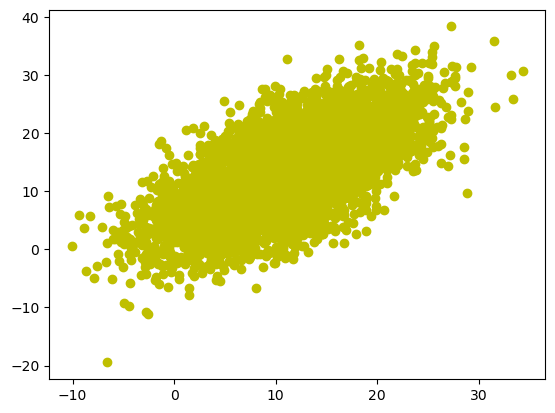

In [18]:
import numpy as np 
mean = [11,13]
cov = [[40,30],[30,50]]
multi = np.random.multivariate_normal(mean,cov,5000)
print(multi)
import matplotlib.pyplot as plt 
plt.scatter(multi[:,0], multi[:,1], c = 'y')
plt.show()

In [17]:
multi.shape

(5000, 2)

In [23]:
import numpy as np 
from scipy.spatial.distance import mahalanobis
print("Enter your 3D vector:")
arr = np.array(list(map(int,input().split())))
std = np.identity(3)
origin = np.zeros(3)
dist = mahalanobis(arr,origin,std)
print(dist)

Enter your 3D vector:


 3 4 5 


7.0710678118654755


In [24]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
import numpy as np 
import pandas as pd 
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
points = np.array([[1,3],[3,1],[2,2],[2,4],[4,3],[200,100]])
mean_vector = np.mean(points, axis = 0)
cov = np.cov(points.T)
inv_cov = np.linalg.inv(cov)
distance = []
for p in points:
    d = mahalanobis(p,mean_vector, inv_cov)
    distance.append(d)
confidence = 0.85
threshold = np.sqrt(chi2.ppf(confidence,2))
df = pd.DataFrame(points, columns = ['x','y'])
df['distance'] = distance
df['outlier'] = df['distance']>threshold
print(df)

     x    y  distance  outlier
0    1    3  0.975971    False
1    3    1  1.587472    False
2    2    2  0.528082    False
3    2    4  1.353081    False
4    4    3  0.501474    False
5  200  100  2.041136     True


In [26]:
mean_vector

array([35.33333333, 18.83333333])

Generate a set of multivariate three-dimensional data following normal distribution with mean µ = [4, 6, 8]T and covariance matrix Σ =[[1 0 0],[0 3 1],[0 1 1]] having size 1000. Plot the generated points in a 3d plot.Further, generate a dataset of two-dimensional points following normal distribution, forming a circle with radius 5 centred around [1, 0]T. Plot the generated points.

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

mean = np.array([4,6,8])
cov = np.array([[1,0,0],[0,3,1],[0,1,1]])
dist_3d = np.random.multivariate_normal(mean,cov,1000)


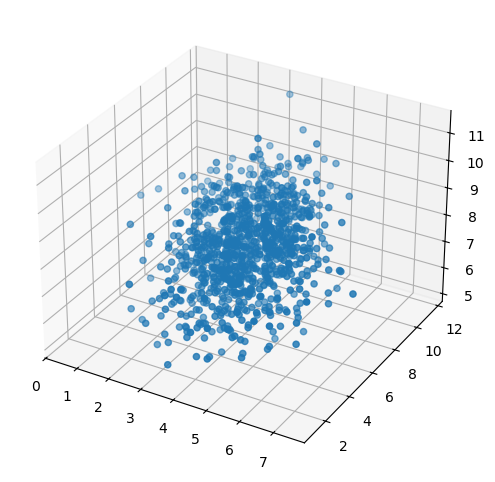

In [32]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(dist_3d[:,0],dist_3d[:,1],dist_3d[:,2])
plt.show()

In [33]:
import numpy as np 
import pandas as pd 
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis

data = np.array([[1,0],[0,1],[1,1],[1,1.5],[1.5,1],[1.5,1.5],[2,1.5],[1.5,2],[1,2],
                 [10000,15000],[20000,15000],[1,15000]])

mean = np.mean(data, axis = 0)
cov = np.cov(data.T)
inv_cov = np.linalg.inv(cov)
distance = []
for p in data:
    d = mahalanobis(p,mean,inv_cov)
    distance.append(d)
confidence_1 = 0.95
threshould_1 = np.sqrt(chi2.ppf(confidence_1,2))
confidence_2 = 0.90
threshould_2 = np.sqrt(chi2.ppf(confidence_2,2))
confidence_3 = 0.85
threshould_3 = np.sqrt(chi2.ppf(confidence_3,2))

df = pd.DataFrame(data, columns = ['X','Y'])
df['distance'] = distance
df['outlier_1'] = df['distance']>threshould_1
df['outlier_2'] = df['distance']>threshould_2
df['outlier_3'] = df['distance']>threshould_3
print(df)

          X        Y  distance  outlier_1  outlier_2  outlier_3
0       1.0      0.0  0.552959      False      False      False
1       0.0      1.0  0.552812      False      False      False
2       1.0      1.0  0.552812      False      False      False
3       1.0      1.5  0.552738      False      False      False
4       1.5      1.0  0.552812      False      False      False
5       1.5      1.5  0.552738      False      False      False
6       2.0      1.5  0.552738      False      False      False
7       1.5      2.0  0.552664      False      False      False
8       1.0      2.0  0.552664      False      False      False
9   10000.0  15000.0  1.658312      False      False      False
10  20000.0  15000.0  2.872313       True       True       True
11      1.0  15000.0  2.872249       True       True       True


In [42]:
import random
n = 10000
a = -1
b = 5
l = []
for i in range(N):
    x = random.uniform(-1,5)
    f = np.sin(x)-(x**3)/3+1+np.exp(x)
    l.append(f)
sum_ = sum(l)
avg = (sum_/n)
integral = avg*(b-a)
print(integral)

102.06318352248692


In [47]:
n = 10000
count= 0
for _ in range(n):
    x = random.random()
    y = random.random()    
    if (x**2+y**2)<=1:
        count+=1
print("pi:",count/n*4)

pi: 3.1464


In [49]:
## multi armed bandit problem

import numpy as np 
import random

true_probabilities = [0.1,0.2,0.6]
n_arms = len(true_probabilities)
counts = [0]*n_arms
values = [0.0]*n_arms
epsilon = 0.7
n_rounds = 1000
total_reward = 0
for _ in range(n_rounds):
    if random.random()<epsilon:
        chosen_arm = random.randint(0,n_arms-1)
    else:
        chosen_arm = np.argmax(values)
    reward = 1 if random.random()<true_probabilities[chosen_arm] else 0
    counts[chosen_arm]+=1
    values[chosen_arm]+=(reward - values[chosen_arm])/counts[chosen_arm]
    total_reward+=reward
print("Best arm:",np.argmax(values)+1)

Best arm: 3


In [56]:
true_probabilities = [0.1,0.2,0.6]
n_arms = len(true_probabilities)
counts = [0]*n_arms
values = [0.0]*n_arms
epsilon = 0.7
trails = 1000
for _ in range(trails):
    if random.random()<epsilon:
        chosen_arm = random.randint(0,n_arms-1)
    else:
        chosen_arm = np.argmax(values)
    reward = 1 if random.random()<true_probabilities[chosen_arm] else 0
    counts[chosen_arm]+=1
    values[chosen_arm]+=(reward-values[chosen_arm])/counts[chosen_arm]
    total_reward += reward
print(np.argmax(values)+1)
    

3


In [59]:
### UCB
true_probabilities = [0.1,0.2,0.6]
n_arms = len(true_probabilities)
count_0 = 0.0000001
count_1 = 0.0000001
count_2 = 0.0000001
reward_dict={0:0,1:0,2:0}
i_ = []
n_rounds = 1000
for _ in range(1,n_rounds+1):
    chosen_arm = random.randint(0,2)
    reward = 1 if random.random()<true_probabilities[chosen_arm] else 0
    if chosen_arm == 0:
        count_0+=1
        reward_dict[chosen_arm]+=reward
    elif chosen_arm==1:
        count_1+=1
        reward_dict[chosen_arm]+=reward
    else:
        count_2+=1
        reward_dict[chosen_arm]+=reward
    mu_0 = reward_dict[chosen_arm]/count_0
    mu_1 = reward_dict[chosen_arm]/count_1
    mu_2 = reward_dict[chosen_arm]/count_2
    ucb = []
    ucb.append(mu_0+np.sqrt(2*np.log(_)/count_0))
    ucb.append(mu_1+np.sqrt(2*np.log(_)/count_1))
    ucb.append(mu_2+np.sqrt(2*np.log(_)/count_2))

    i = np.argmax(ucb)
    i_.append(i)
count_dict = {}
for _ in i_:
    if _ not in count_dict:
        count_dict[_]=1
    else:
        count_dict[_]+=1
print("Best arm:", max(count_dict)+1)

Best arm: 3


In [60]:
count_dict

{np.int64(0): 20, np.int64(1): 481, np.int64(2): 499}

In [61]:
import numpy as np

# True reward probabilities for each arm
true_probs = [0.1, 0.2, 0.6]
n_arms = len(true_probs)
n_rounds = 1000

def run_ucb1(true_probs, n_rounds):
    n_arms = len(true_probs)
    counts = np.zeros(n_arms)   # Number of times each arm is pulled
    values = np.zeros(n_arms)   # Estimated mean reward for each arm
    rewards = []

    for t in range(n_rounds):
        if t < n_arms:
            # Play each arm once initially
            arm = t
        else:
            # Calculate UCB value for each arm
            ucb_values = values + np.sqrt(2 * np.log(t + 1) / counts)
            arm = np.argmax(ucb_values)

        # Get reward (1 or 0) based on true probability
        reward = 1 if np.random.rand() < true_probs[arm] else 0

        # Update counts and running average
        counts[arm] += 1
        values[arm] += (reward - values[arm]) / counts[arm]
        rewards.append(reward)

    return rewards, counts, values

# Run the UCB algorithm
rewards, counts, values = run_ucb1(true_probs, n_rounds)

print("Number of times each arm was selected:", counts.astype(int))
print("Estimated values for each arm:", np.round(values, 3))
print("Best arm:", np.argmax(values) + 1)


Number of times each arm was selected: [ 37  42 921]
Estimated values for each arm: [0.081 0.119 0.578]
Best arm: 3


In [67]:
true_probs = [0.1, 0.2, 0.6]
n_arms = len(true_probabilities)
counts = [0]*n_arms
values = [0]*n_arms
n_rounds = 1000
for t in range(n_rounds):
    if t < n_arms:
        arm = t
    else:
        ucb = values+np.sqrt(2*np.log(t+1)/counts)
        arm = np.argmax(ucb)
    reward = 1 if random.random()<true_probs[arm] else 0
    counts[arm]+=1
    values[arm] += (reward-values[arm])/counts[arm]
print(np.argmax(values)+1)
    

3


In [68]:
import numpy as np

def run_thompson_sampling(true_probs, n_rounds):
    n_arms = len(true_probs)
    alpha = np.ones(n_arms)  # Success counts (prior)
    beta = np.ones(n_arms)   # Failure counts (prior)
    rewards = []

    for t in range(n_rounds):
        # Sample from Beta distribution for each arm
        sampled_probs = np.random.beta(alpha, beta)

        # Choose the arm with the highest sampled value
        arm = np.argmax(sampled_probs)

        # Simulate pulling the arm
        reward = 1 if np.random.rand() < true_probs[arm] else 0

        # Update the arm's posterior
        alpha[arm] += reward       # Increment success count if reward = 1
        beta[arm] += (1 - reward)  # Increment failure count otherwise

        rewards.append(reward)

    return rewards, alpha, beta


rewards, alpha, beta = run_thompson_sampling([0.1, 0.2, 0.6], 1000)
print("Alpha:", np.round(alpha,2))
print("Beta:", np.round(beta,2))
print("Best arm:", np.argmax(alpha/(alpha+beta)) + 1)



Alpha: [  3.   1. 583.]
Beta: [ 11.   8. 400.]
Best arm: 3


In [69]:
import numpy as np
import random

# Define the states
states = ["A", "B"]

# Step function: defines how the environment behaves
def step(state):
    if state == "B":
        return "B", 0  # Terminal state, reward = 0
    # From state A
    if random.random() < 0.5:
        return "A", 0   # Stay in A, reward = 0
    else:
        return "B", 1   # Move to B, reward = 1

# Initialize value function and returns
V = {"A": 0.0, "B": 0.0}
returns = {"A": []}
gamma = 1.0  # Discount factor

# Function to generate one full episode (sequence of state, reward pairs)
def generate_episode():
    state = "A"
    episode = []
    while state != "B":
        next_state, reward = step(state)
        episode.append((state, reward))
        state = next_state
    return episode

# Monte Carlo estimation over many episodes
for _ in range(10000):
    episode = generate_episode()
    G = 0  # Return
    # Traverse the episode backward to calculate returns
    for t in reversed(range(len(episode))):
        s, r = episode[t]
        G = gamma * G + r
        # First-visit MC: only update for the first occurrence of each state
        if s not in [x[0] for x in episode[:t]]:
            returns[s].append(G)
            V[s] = np.mean(returns[s])

# Display the estimated value function
print("Estimated Value Function:")
for state in V:
    print(f"V({state}) = {V[state]:.4f}")


Estimated Value Function:
V(A) = 1.0000
V(B) = 0.0000


In [71]:
import numpy as np
import random

# Define states and actions
states = ["A", "B"]
actions = ["stay", "go"]

# Environment dynamics
def step(state, action):
    if state == "B":
        return "B", 0  # Terminal
    if action == "stay":
        return "A", 0
    elif action == "go":
        return "B", 1

# Initialize Q-values and returns
Q = {s: {a: 0.0 for a in actions} for s in states}
returns = {s: {a: [] for a in actions} for s in states}

# Parameters
epsilon = 0.1
gamma = 1.0

# Epsilon-greedy action selection
def get_action(state):
    if state == "B":
        return None
    if random.random() < epsilon:
        return random.choice(actions)
    else:
        # Pick the action with max Q-value
        best_action = max(Q[state], key=Q[state].get)
        return best_action

# Generate an episode
def generate_episode():
    state = "A"
    episode = []
    while state != "B":
        action = get_action(state)
        next_state, reward = step(state, action)
        episode.append((state, action, reward))
        state = next_state
    return episode

# Monte Carlo Control: First-Visit
for _ in range(5000):
    episode = generate_episode()
    G = 0
    visited = set()  # Keep track of first visits
    for t in range(len(episode)):
        s, a, r = episode[t]
        G = gamma * G + r
        if (s, a) not in visited:
            visited.add((s, a))
            returns[s][a].append(G)
            Q[s][a] = np.mean(returns[s][a])

# Print estimated Q-values
print("Estimated Q-values:")
for s in Q:
    print(f"{s}: {Q[s]}")

# Derive optimal policy
policy = {s: max(Q[s], key=Q[s].get) if s != "B" else None for s in states}
print("\nOptimal Policy:")
print(policy)


Estimated Q-values:
A: {'stay': np.float64(0.0), 'go': np.float64(1.0)}
B: {'stay': 0.0, 'go': 0.0}

Optimal Policy:
{'A': 'go', 'B': None}
